<a href="https://colab.research.google.com/github/Compiler0110/NetflixMovieData/blob/main/NetflixMovieData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
netflix_data = pd.read_csv("netflix_dataset.csv", index_col=0)
netflix_data

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


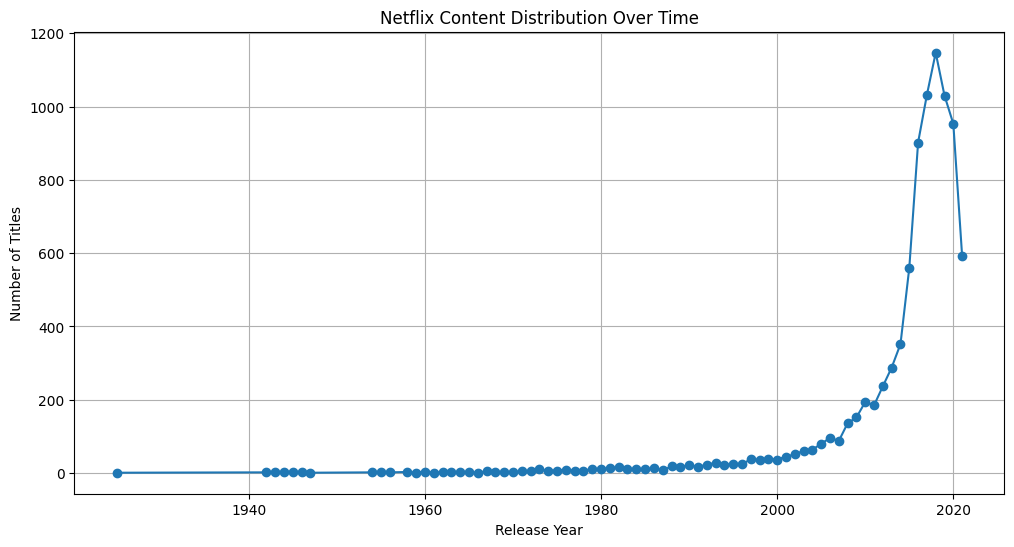

In [4]:
content_distribution = netflix_data['release_year'].value_counts().sort_index()
content_distribution

plt.figure(figsize=(12,6))
plt.plot(content_distribution.index, content_distribution.values, marker='o', linestyle='-')
plt.title('Netflix Content Distribution Over Time')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()

In [5]:
top_directors = netflix_data['director'].value_counts().head(10)


print("Top Directors:")
print(top_directors)


netflix_data['cast'] = netflix_data['cast'].str.split(', ').apply(lambda x: x if isinstance(x, list) else [])
all_cast_members = [cast for sublist in netflix_data['cast'] for cast in sublist if sublist]
top_cast_members = pd.Series(all_cast_members).value_counts().head(10)


print("\nTop Cast Members:")
print(top_cast_members)

Top Directors:
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: director, dtype: int64

Top Cast Members:
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
dtype: int64


Top counteies with the most Content : 
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: country, dtype: int64


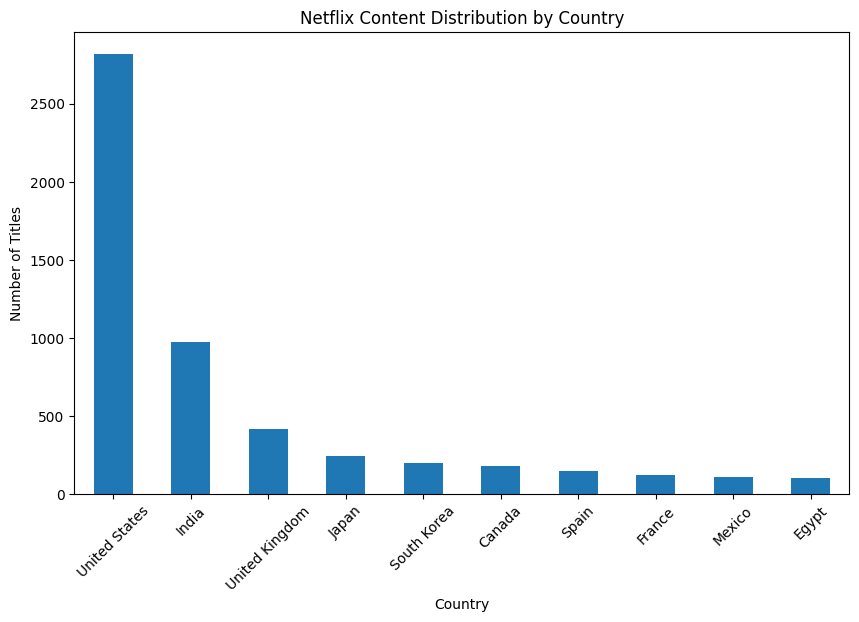

In [6]:
country_counts = netflix_data['country'].value_counts()
print('Top counteies with the most Content : ')
print(country_counts.head(10))
top_countries = country_counts.head(10)
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar')
plt.title('Netflix Content Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()

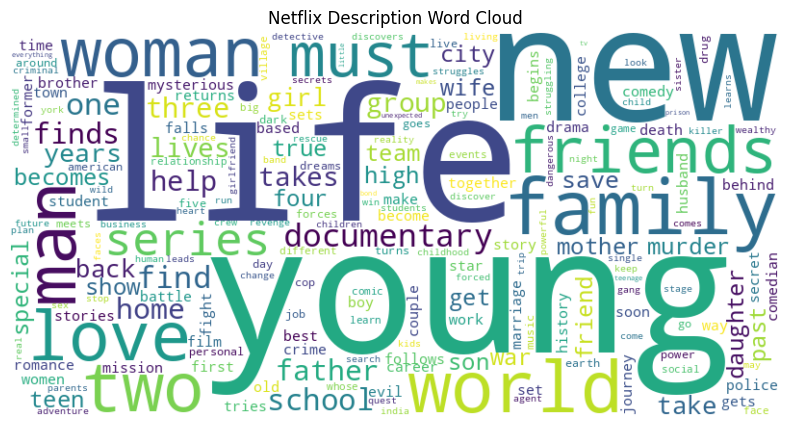

In [7]:

descriptions = ' '.join(netflix_data['description'].dropna())
words = word_tokenize(descriptions)

stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
word_counts = {}
for word in filtered_words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Description Word Cloud')
plt.show()

In [8]:
analyzer = SentimentIntensityAnalyzer()

sentiments = []
for description in netflix_data['description']:
    sentiment = analyzer.polarity_scores(description)
    compound_score = sentiment['compound']

    if compound_score >= 0.05:
        sentiment_category = 'positive'
    elif compound_score <= -0.05:
        sentiment_category = 'negative'
    else:
        sentiment_category = 'neutral'

    sentiments.append(sentiment_category)

netflix_data['sentiment'] = sentiments

sentiment_counts = netflix_data['sentiment'].value_counts()
print("Sentiment Distribution:")
print(sentiment_counts)

Sentiment Distribution:
positive    4029
negative    3787
neutral      991
Name: sentiment, dtype: int64
